<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Linear Regression

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Linear Regression**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Linear Regression](https://youtu.be/0fzbyhWiP84)
* [Ridge Regression](https://youtu.be/pMGO40yXZ5Y?si=ygJAheyX-v2BmSiR)
* [LASSO Regression](https://youtu.be/cVFYhlCCI_8?si=NbwIDaZj30vxezn2)
* [Norms](https://youtu.be/JmxGlrurQp0?si=vuF1TXDbZkyRC1j-)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Linear Regression

Why include a chapter on linear regression in a geostatistics e-book?

* linear regression provides a foundation for model training from training data, model checking and uncertainty reporting and model predictions

* geostatistics is based on kriging, a linear estimator

* linear regression often is found in geostatistical workflows, for example fitting linear trends for calculating a stationary residual 

Here's some basic details about linear regression. 

#### Linear Regression

Linear regression for prediction, let's start by looking at a linear model fit to a set of data.

<figure style="text-align: center;">
  <img src="_static/linear/linear_example.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Example linear regression model.</figcaption>
</figure>

Let's start by defining some terms,

* **predictor feature** - an input feature for the prediction model, given we are only discussing linear regression and not multilinear regression we have only one predictor feature, $x$. On out plots (including above) the predictor feature is on the x-axis.

* **response feature** - the output feature for the prediction model, in this case, $y$. On our plots (including above) the response feature is on the y-axis.

Now, here are some key aspects of linear regression:

**Parametric Model**

This is a parametric predictive machine learning model, we accept an a prior assumption of linearity and then gain a very low parametric representation that is easy to train without a onerous amount of data.

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.
* the parametric model takes the form of: 

$$
y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0
$$

Here's the visualization of the linear model parameters,

<figure style="text-align: center;">
  <img src="_static/linear/linear_model.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">The linear model parameters.</figcaption>
</figure>

**Least Squares**

The analytical solution for the model parameters, $b_1,\ldots,b_m,b_0$, is available for the L2 norm loss function, the errors are summed and squared known a least squares.
* we minimize the error, residual sum of squares (RSS) over the training data: 

$$
RSS = \sum_{i=1}^n \left(y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha,i} + b_0) \right)^2
$$

where $y_i$ is the actual response feature values and $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$ are the model predictions, over the $\alpha = 1,\ldots,n$ training data.

Here's a visualization of the L2 norm loss function, MSE,

<figure style="text-align: center;">
  <img src="_static/linear/linear_MSE.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">The linear model loss function, mean square error.</figcaption>
</figure>

* this may be simplified as the sum of square error over the training data, 

\begin{equation}
\sum_{i=1}^n (\Delta y_i)^2
\end{equation}

where $\Delta y_i$ is actual response feature observation $y_i$ minus the model prediction $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$, over the $i = 1,\ldots,n$ training data.

**Assumptions**

There are important assumption with our linear regression model,
* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features

#### Linear Regression Training

For the least squares (L2) norm the linear regression model parameters can be trained with training data with an analytical solution. Let's derive it for linear regression analytical solution for the case of 1 predictor feature. 

To calculated the slope coefficient, $b_1$, we start with the loss function,

$$
RSS = \sum_{i=1}^n \left(y_i - \left( b_{1} x_{i} + b_0 \right) \right)^2 = \sum_{i=1}^n \left(y_i - b_{1} x_{i} - b_0 \right)^2
$$

Now we take the partial derivative with respect to the model parameter, $b_1$,

$$
\frac{\partial}{\partial b_1} \sum_{i=1}^n \left(y_i - b_{1} x_{i} - b_0 \right)^2 = \sum_{i=1}^n -2 \cdot x_i \left(y_i - b_0 -b_1 x_i \right)
$$

to optimize, minimize the loss, we set the partical derivative with respect to the model parameter, $b_1$ equal to 0.0.

$$
0 = \sum_{i=1}^n -2 \cdot x_i \left(y_i - b_0 -b_1 x_i \right)
$$

we can simplify (divide both sides by -2) and distribute multiply to get,

$$
0 = \sum_{i=1}^n x_i \cdot y_i - b_0 \cdot x_i -b_1 x_i^2 
$$

now we can substitute in $b_0 = \overline{y} - b_1 \cdot \overline{x}$,

$$
0 = \sum_{i=1}^n x_i \cdot y_i - \left(\overline{y} - b_1 \cdot \overline{x} \right) \cdot x_i - b_1 x_i^2 
$$

once again we multiply to get,

$$
0 = \sum_{i=1}^n x_i \cdot y_i - \overline{y} \cdot x_i + b_1 \cdot \overline{x} \cdot x_i - b_1 x_i^2 
$$

we separate the sums,

$$
0 = \sum_{i=1}^n x_i \cdot y_i - \overline{y} \cdot x_i + \sum_{i=1}^n b_1 \cdot \overline{x} \cdot x_i - b_1 x_i^2 
$$

and we can pull out the $b_1$ constant,

$$
0 = \sum_{i=1}^n x_i \cdot y_i - \overline{y} \cdot x_i +  b_1 \sum_{i=1}^n \overline{x} \cdot x_i - x_i^2 
$$

and reorder a little to get, 

$$
0 = \sum_{i=1}^n x_i \cdot y_i - \overline{y} \cdot x_i - b_1 \sum_{i=1}^n x_i^2 - \overline{x} \cdot x_i
$$

move to the other side,

$$
b_1 \sum_{i=1}^n x_i^2 - \overline{x} \cdot x_i = \sum_{i=1}^n x_i \cdot y_i - \overline{y} \cdot x_i
$$

and divide both sizes by $\sum_{i=1}^n x_i^2 - \overline{x} \cdot x_i$,

$$
b_1 = \frac{\sum_{i=1}^n x_i \cdot y_i - \overline{y} \cdot x_i}{\sum_{i=1}^n x_i^2 - \overline{x} \cdot x_i}
$$

we now have an analytical solution for the $b_1$ slope term for linear regression. It can be shown that this is equivalent to another form,

$$
b_1 = \frac{\sum_{i=1}^n \left( x_i - \overline{x} \right) \cdot \left( y_i - \overline{y} \right)}{\sum_{i=1}^n \left( x_i - \overline{x} \right)^2}
$$

I prefer this form because it is easily interpreted as the covariance of $X$ and $Y$, $C_{x,y}$ divided by the variance of $X$, $sigma_{x}^2$.

Now for the calculation of the intercept term, $b_0$, we return to the loss function,

$$
RSS = \sum_{i=1}^n \left(y_i - \left( b_{1} x_{i} + b_0 \right) \right)^2 = \sum_{i=1}^n \left(y_i - b_{1} x_{i} - b_0 \right)^2
$$

and this time we take the partial derivative with respect to $b_0$,

$$
\frac{\partial}{\partial b_0} \sum_{i=1}^n \left(y_i - b_{1} x_{i} - b_0 \right)^2 = \sum_{i=1}^n -2 \left(y_i - b_0 -b_1 x_i \right)
$$

to optimize, minimize the loss, we set the partical derivative with respect to the model parameter, $b_0$ equal to 0.0.

$$
0 = \sum_{i=1}^n -2 \left(y_i - b_0 -b_1 x_i \right)
$$

we divide both sides by -2,

$$
0 = \sum_{i=1}^n y_i - b_0 -b_1 x_i
$$

and break up the sum,

$$
0 = \sum_{i=1}^n y_i - \sum_{i=1}^n b_0 - \sum_{i=1}^n b_1 x_i
$$

simplify the simple term as it is a constant, $\sum_{i=1}^n b_0 = n \cdot b_0$,

$$
0 = \sum_{i=1}^n y_i - n \cdot b_0 - \sum_{i=1}^n b_1 x_i
$$

now move the $b_0$ term to the left-hand side,

$$
n \cdot b_0 = \sum_{i=1}^n y_i - \sum_{i=1}^n b_1 x_i
$$

pull out the constant $b_1$ from the sum,

$$
n \cdot b_0 = \sum_{i=1}^n y_i - b_1 \sum_{i=1}^n x_i
$$

divide both sides by $n$,

$$
b_0 = \frac{\sum_{i=1}^n y_i}{n} - b_1 \frac{\sum_{i=1}^n x_i}{n}
$$

this is very interesting, we now see 2 arithmetic means! 

$$
\frac{\sum_{i=1}^n y_i}{n} = \overline{y} \quad \quad \frac{\sum_{i=1}^n x_i}{n} = \overline{x}
$$

so our solution is simply,

$$
b_0 = \overline{y} - b_1 \cdot \overline{x}
$$

#### Checking the Model

For linear regression models we have access to a powerful metric to check our model, the coefficient of determination, also known as "r-squared", $r^2$.

* the proportion of variance explained by the model

* calculated as the explained variance, $SS_{reg}$ divided by the total variance, $SS_{tot}$,

$$
SS_{reg} = \sum_{i=1}^n \left(\hat{y}_i - \overline{y} \right)^2 \quad \quad SS_{tot} = \sum_{i=1}^n \left(y_i - \overline{y} \right)^2
$$

where $\hat{y}_i$ is the model prediction at the $i$ training data, and $\overline{y} is the average of the sample data.

* the $r^2$ can be calculated from the correlation coefficient, so you can know the goodness of a linear regression model, before you train it!

$$
r^2 = \left(\rho_{x,y} \right)^2
$$

note, $r^2$ can only be used for linear models where,

$$
\sigma^2_{tot} = \sigma^2_{reg} + \sigma^2_{res}
$$

where $\sigma^2_{tot}$ is total variance of the response feature, $\sigma^2_{reg}$ is the variance of the model predictions, and $\sigma^2_{res}$ is the variance of the error, i.e., the residuals, $\Delta y_i = y_i - \hat{y}_i$.

How to interpret $r^2$? It would be dangerous to hard thresholds, but I can give some soft guidance,

* $r^2 \ge 0.98$ - the model is cheating or the problem is very easy, linear, noise-free and well sampled

* $0.0 \le r^2 \le 0.6$ - the model is not working well, check the data and model choice

* $r^2 \lt 0.0$ - the model is going the wrong way! You are better off with estimating by the global mean, $\overline{y}$

#### Model Uncertainty

To communicate model uncertainty we rely on confidence intervals for the model parameters, $b_1$ and $b_0$. Let's define confidence interval here for convenience,

**Confidence Interval** - the uncertainty in a summary statistic / model / model parameter represented as a range, lower and upper bound, based on a specified probability interval known as the confidence level.

We communicate confidence intervals like this:

* there is a 95% probability (or 19 times out of 20) that model slope is between 0.5 and 0.7. 

We cover analytical methods here, but we could also use the more flexible [Bootstrap](GeostatsPy_bootstrap) approach.

That's enough here, let's load data and explain more as we demonstrate linear regression.

#### Load the Required Libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
suppress_warnings = False
import os                                                     # to set current working directory 
import math                                                   # square root
import numpy as np                                            # arrays and matrix math
import scipy.stats as st                                      # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # suppress any warnings for this demonstration
    warnings.filterwarnings('ignore')    

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 

#### Declare Functions

Let's define a function to streamline the addition specified percentiles and major and minor gridlines to our plots.

In [2]:
def weighted_percentile(data, weights, perc):                 # calculate weighted percentile (iambr on StackOverflow @ https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy/32216049) 
    ix = np.argsort(data)
    data = data[ix] 
    weights = weights[ix] 
    cdf = (np.cumsum(weights) - 0.5 * weights) / np.sum(weights) 
    return np.interp(perc, cdf, data)

def histogram_bounds(values,weights,color):                   # add uncertainty bounds to a histogram          
    p10 = weighted_percentile(values,weights,0.1); avg = np.average(values,weights=weights); p90 = weighted_percentile(values,weights,0.9)
    plt.plot([p10,p10],[0.0,45],color = color,linestyle='dashed')
    plt.plot([avg,avg],[0.0,45],color = color)
    plt.plot([p90,p90],[0.0,45],color = color,linestyle='dashed')

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [3]:
#os.chdir("C:\PGE337")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

Let's load the provided multivariate, spatial dataset 'unconv_MV.csv'. This dataset has variables from 1,000 unconventional wells including:

* density ($g/cm^{3}$)
* porosity (volume %) 

Note, the dataset is synthetic.

We load it with the pandas 'read_csv' function into a DataFrame we called 'my_data' and then preview it to make sure it loaded correctly.

In [4]:
add_error = False                                             # add random error to the response feature for testing
std_error = 1.0; seed = 71071

yname = 'Porosity'; xname = 'Density'                         # specify the predictor features (x2) and response feature (x1)
xmin = 1.0; xmax = 2.5                                        # set minimums and maximums for visualization 
ymin = 0.0; ymax = 25.0    
yunit = '%'; xunit = '$g/cm^{3}$'    
Xlabelunit = xname + ' (' + xunit + ')'
ylabelunit = yname + ' (' + yunit + ')'

#df = pd.read_csv("Density_Por_data.csv")                     # load the data from local current directory
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load the data from my github repo
df = df.sample(frac=.30, random_state = 73073); df = df.reset_index() # extract 30% random to reduce the number of data

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df[yname] = df[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df)) # add noise
    values = df._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray
    
dfy = pd.DataFrame(df[yname])                                 # extract selected features as X and y DataFrames
dfx = pd.DataFrame(df[xname])
df = pd.concat([dfx,dfy],axis=1)                              # make one DataFrame with both X and y (remove all other features)

y = df[yname].values.reshape(len(df))
x = df[xname].values.reshape(len(df))
dX = np.linspace(xmin,xmax,100)                               # values for plotting the model

#### Visualize the DataFrame

Visualizing the DataFrame is useful first check of the data.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

* add parameter 'n=13' to see the first 13 rows of the dataset. 

In [5]:
df.head(n=13)                                                 # we could also use this command for a table preview

,Density,Porosity
0,1.906634,12.845691
1,1.404932,13.668073
2,1.795190,11.015021
3,1.705466,17.185360
4,1.821963,8.190405
5,1.708322,10.728462
6,1.897087,11.245838
7,1.864561,11.357547
8,2.119652,8.614564
9,1.301057,15.280571


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. 

* We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [6]:
df.describe().transpose()                                     # summary statistics

,count,mean,std,min,25%,50%,75%,max
Density,32.0,1.719994,0.262314,0.996736,1.547192,1.770422,1.838704,2.331653
Porosity,32.0,12.317525,3.224611,4.968240,10.492582,11.341744,14.459041,20.964941


#### Data Visualization

We should also take a look at the histograms.

* get a sense of the range, modes, skew, outliers etc. for each feature

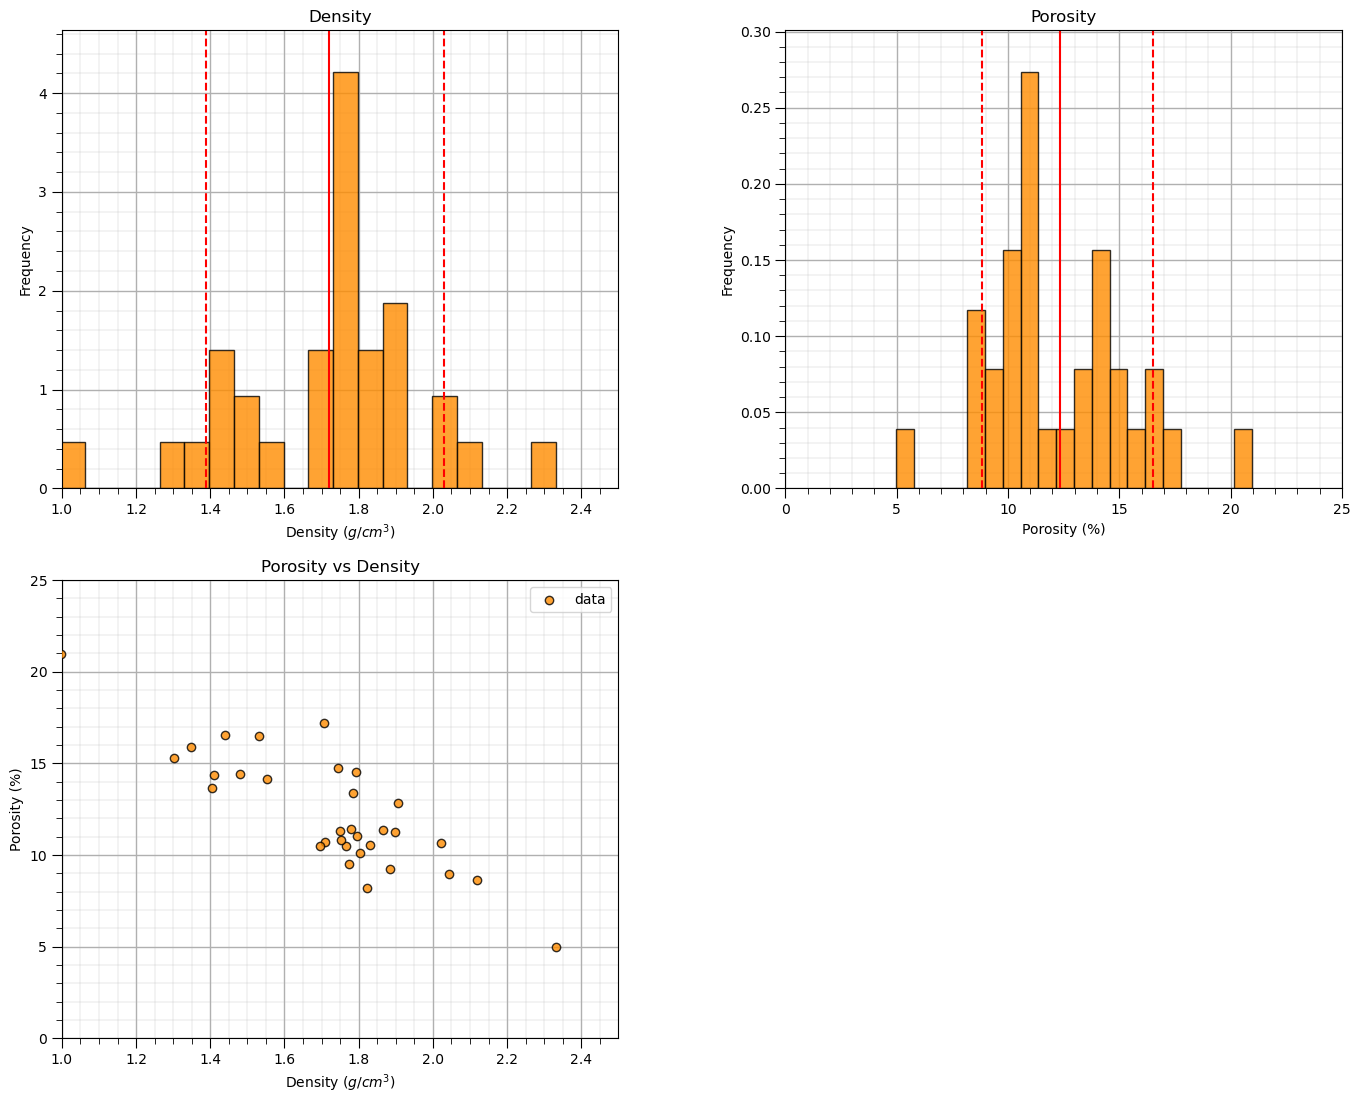

In [7]:
nbins = 20                                                    # number of histogram bins

plt.subplot(221)
freq,_,_ = plt.hist(x=df[xname],weights=None,bins=nbins,alpha = 0.8,edgecolor='black',color='darkorange',density=True)
histogram_bounds(values=df[xname].values,weights=np.ones(len(df)),color='red')
plt.xlabel(xname + ' (' + xunit + ')'); plt.ylabel('Frequency'); plt.ylim([0.0,freq.max()*1.10]); plt.title('Density'); add_grid()  
plt.xlim([xmin,xmax])    

plt.subplot(222)
freq,_,_ = plt.hist(x=df[yname],weights=None,bins=nbins,alpha = 0.8,edgecolor='black',color='darkorange',density=True)
histogram_bounds(values=df[yname].values,weights=np.ones(len(df)),color='red')
plt.xlabel(yname + ' (' + yunit + ')'); plt.ylabel('Frequency'); plt.ylim([0.0,freq.max()*1.10]); plt.title('Porosity'); add_grid()  
plt.xlim([ymin,ymax])  

plt.subplot(223)                                              # plot the model
plt.scatter(df[xname],df[yname],marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10)
plt.title('Porosity vs Density')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

#### Linear Regression Model

Let's first train a linear regression model to all our data with SciPy package, stats module.

* we will develop more complicated cross validation training and tuning methods latter with training and testing data splits latter. For now all the data is used to train the model.

* recall we imported the module as 'st' above

````python
import scipy.stats as st                                    # statistical methods
````



We instantiate, train the linear regression model and get model diagnostics for confidence intervals and hypothesis testing all in one line of code!

In [8]:
linear = st.linregress(x,y)                              # output is the linear regression model
print('\nOutput from linregress function is ' + str(type(linear)) + ':')
print(linear)
print('\nLinear Regression Model:')
print('  Slope: ' + str(round(linear.slope,2)))
print('  Intercept: ' + str(round(linear.intercept,2)))
print('  Square Root of R-squared: ' + str(round(linear.rvalue,2)))
print('  Slope p-value: ' + str(round(linear.pvalue,2)))
print('  Slope standard error: ' + str(round(linear.stderr,2)))


Output from linregress function is <class 'scipy.stats._stats_mstats_common.LinregressResult'>:
LinregressResult(slope=-10.299027776212867, intercept=30.031787443778178, rvalue=-0.8377990494298145, pvalue=2.2197132981703346e-09, stderr=1.2253818618389407, intercept_stderr=2.1312614958323954)

Linear Regression Model:
  Slope: -10.3
  Intercept: 30.03
  Square Root of R-squared: -0.84
  Slope p-value: 0.0
  Slope standard error: 1.23


#### Visualize the Linear Regression Model

Now let's visualize the linear regression model with the data.

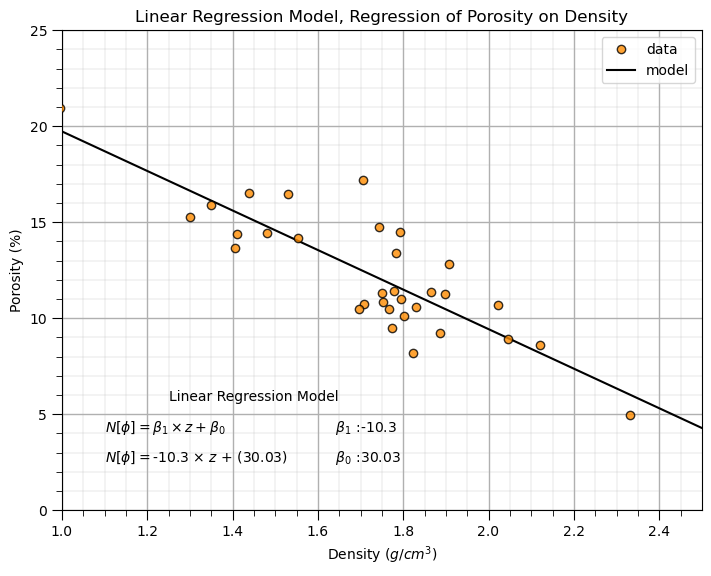

In [9]:
x_values = np.linspace(xmin,xmax,100)                         # return an array of density values 
y_model = linear.slope * x_values + linear.intercept          # apply our linear regression model to estimate at the training data values

plt.subplot(111)                                              # plot the model
plt.plot(x, y, 'o', label='data', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black',zorder=10)
plt.plot(x_values, y_model, label='model', color = 'black',zorder=1)
plt.title('Linear Regression Model, Regression of ' + yname + ' on ' + xname)
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.annotate('Linear Regression Model',[1.25,5.7])
plt.annotate(r'    $\beta_1$ :' + str(round(linear.slope,2)),[1.6,4.1])
plt.annotate(r'    $\beta_0$ :' + str(round(linear.intercept,2)),[1.6,2.5])
plt.annotate(r'$N[\phi] = \beta_1 \times z + \beta_0$',[1.1,4.1])
plt.annotate(r'$N[\phi] = $' + str(round(linear.slope,2)) + r' $\times$ $z$ + (' + str(round(linear.intercept,2)) + ')',[1.1,2.5])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

The model looks reasonable. Let's go beyond occular inspection.

#### Model Checking with Hypothesis Testing and $r^2$ Values

Now let's calculate the $r^2$, proportion of variance explained. Here's the variance explained by the model:

\begin{equation}
𝑠𝑠𝑟𝑒𝑔 = \sum_{𝑖=1}^{𝑛}\left(\hat{y}_i - \overline{y}\right)^2 
\end{equation}

and the variance not explained by the model:

\begin{equation}
𝑠𝑠𝑟𝑒sid = \sum_{𝑖=1}^{𝑛}\left(y_i - \hat{y}\right)^2 
\end{equation}

Now we can calculate the variance explained as:

\begin{equation}
𝑟^2 = \frac{𝑠𝑠_{𝑟𝑒𝑔}}{𝑠𝑠_{𝑟𝑒𝑔}+𝑠𝑠_{𝑟𝑒𝑠𝑖𝑑}} = \frac{\text{variance explained}}{\text{total variance}}
\end{equation}

Now we can check the $r^2$ value for our model. 

In [10]:
print('The r-squared value of the linear regression model is ' + str(round(linear.rvalue**2.0,3)))

The r-squared value of the linear regression model is 0.702


#### Model Confidence Intervals

Let's calculate the 95% confidence interval for the linear regression model slope parameter, $b_1$, of our model.

\begin{equation}
CI_{\hat{b_1}}: \hat{b}_1 ± t_{(\frac{\alpha}{2},n-2)} \times SE_{b_1} 
\end{equation}

\begin{equation}
CI_{\hat{b_0}}: \hat{b}_0 ± t_{(\frac{\alpha}{2},n-2)} \times SE_{b_0} 
\end{equation}

where standard errors are calculated as:

\begin{equation}
SE_{b_1} = \frac{\sqrt{n}\hat{\sigma}}{\sqrt{n-1} \sqrt{\sum(x_i - \overline{x})^2  } }
\end{equation}

\begin{equation}
SE_{b_0} = \sqrt{ \frac{\hat{\sigma}^2}{n-2} }
\end{equation}

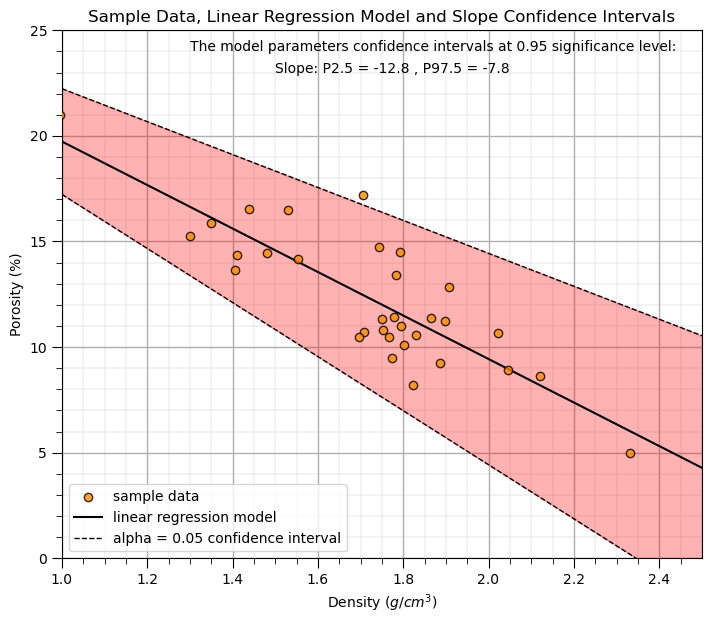

In [11]:
alpha = 0.05
tstat = st.t.ppf([alpha/2,1-alpha/2], len(x)-2)            # calculate t-stat for confidence interval
slope_lower,slope_upper = linear.slope + tstat*linear.stderr # calculate the lower and upper confidence interval for b1

plt.scatter(x, y, color = 'darkorange',edgecolor='black',alpha=0.8,label='sample data',zorder=10)
plt.plot(dX, linear.intercept + linear.slope*dX, 'black', label='linear regression model')
plt.plot(dX, linear.intercept + slope_upper*dX, 'black',ls='--',lw=1,label=r'alpha = ' + str(alpha) + ' confidence interval')
plt.plot(dX, linear.intercept + slope_lower*dX, 'black',ls='--',lw=1)
plt.annotate('The model parameters confidence intervals at ' + str(1-alpha) + ' significance level:',[1.3,24])
plt.annotate('Slope: P' + str(alpha/2*100) + ' = '+ str(round(slope_lower,2)) + ' , P' + str((1-alpha/2)*100) + ' = ' + str(round(slope_upper,2)),[1.5,23])
plt.fill_between(dX,linear.intercept + slope_upper*dX,linear.intercept + slope_lower*dX,color='red',alpha=0.3,zorder=1)
plt.title('Sample Data, Linear Regression Model and Slope Confidence Intervals'); plt.xlabel(r'Density ($g/cm^3$)'); plt.ylabel('Porosity (%)')
plt.legend(loc='lower left'); add_grid(); plt.ylim([ymin,ymax]); plt.xlim([xmin,xmax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.1, hspace=0.2); plt.show()

#### Model Prediction Intervals

Let's calculate the prediction intervals.

\begin{equation}
\hat{y}_{n+1} ± t_{(\frac{\alpha}{2},n-2)} \sqrt{MSE}\ \times \sqrt{1+\frac{1}{n}+\frac{(x_{n+1}-\overline{x})^2}{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}  }
\end{equation}

Note, this is the standard error of the prediction:

\begin{equation}
SE_{\hat{y}_{n+1}} = \sqrt{MSE}\ \times \sqrt{1+\frac{1}{n}+\frac{(x_{n+1}-\overline{x})^2}{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}  }
\end{equation}

where MSE, model mean square error calculated as:

\begin{equation}
MSE = \sum_{i=1}^n\frac{(y_i - \hat{y}_i)^2}{n-2} = \sum_{i=1}^n \frac{\left(y_i - (b_1 x - b_0) \right)^2}{n-2}
\end{equation}

Note, that this indicates that prediction intervals are wider the further we estimate from the mean of the predictor feature values. We can substitute model MSE, MSE, and standard error of the estimate, $SE_{\hat{y}_{n+1}}$ for the final form is:

\begin{equation}
\hat{y}_{n+1} ± t_{(\frac{\alpha}{2},n-2)} \sqrt{\sum_{i=1}^n \frac{\left(y_i - (b_1 x - b_0) \right)^2}{n-2}}\sqrt{1+\frac{1}{n}+\frac{(x_{n+1}-\overline{x})^2}{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}  }
\end{equation}

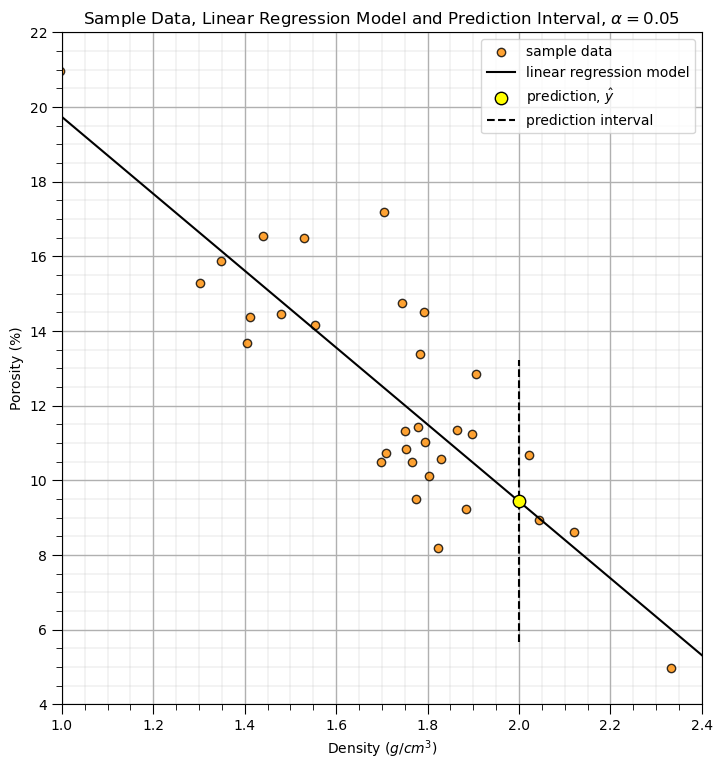

In [12]:
new_X = 2.00
alpha = 0.05

tstat = st.t.ppf([alpha/2,1-alpha/2], len(x)-2)

yhat = linear.intercept + linear.slope*x
MSE = np.sum(np.power(y-yhat,2))/(len(y)-2) # mean square error
est_stderr = math.sqrt(MSE) \
      *math.sqrt(1 + 1/len(y) + np.power(new_X - np.average(x),2)/ \
      np.sum(np.power(x-np.average(x),2)))

y_pred_lower, y_pred_upper = linear.intercept + linear.slope*new_X + tstat*est_stderr

plt.scatter(x, y, color = 'darkorange',edgecolor='black',alpha=0.8,label='sample data',zorder=1)
plt.plot(dX, linear.intercept + linear.slope*dX, 'black', label='linear regression model',zorder=1)
plt.scatter(new_X, linear.intercept + linear.slope*new_X,s=80,color='yellow',edgecolor='black',label=r'prediction, $\hat{y}$',zorder=2)
plt.plot([new_X,new_X],[y_pred_lower,y_pred_upper],color='black',linestyle='dashed',zorder=1,label='prediction interval')
plt.title(r'Sample Data, Linear Regression Model and Prediction Interval, $\alpha = $' + str(alpha)); plt.xlabel(r'Density ($g/cm^3$)'); 
plt.ylabel('Porosity (%)')
plt.legend(); add_grid(); plt.ylim([4,22]); plt.xlim([1.0,2.4])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.4, wspace=0.1, hspace=0.2); plt.show()

The model looks reasonable. Let's go beyond occular inspection.

#### Model Checking with Hypothesis Testing and $r^2$ Values

Let's test the slope with the following hypothesis test:

\begin{equation}
H_0: b_{1} = 0.0
\end{equation}

\begin{equation}
H_1: b_{1} \ne 0.0
\end{equation}

and see if we can reject this hypothesis, $H_{0}$ , that the slope parameter is equal to 0.0.  If we reject this null hypothesis, we show that the slope is meaningful, there is a linear relationship between density and porosity that we can use.

Fortunately, the linregress function from the stats package and linear function from scikit-learn package provides us with the two sided p-value for this test for the slope, $b_1$ coefficient. 

In [13]:
print('Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero = ' + str(linear.pvalue) + '.')      

Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero = 2.2197132981703346e-09.


Since the p-value is less than any reasonable $\alpha$ value, we reject the null hypothesis and adopt the alternative hypothesis, $H_1$, that the slope is not equal to 0.0.

We can also perform the entire hypothesis test by calculating the,

$$
t_{statistic} = \frac{b_1}{SE_{b_1}} 
$$

First we need the $t_{critical}$ value, given $\alpha$ and $df = n-2$.

In [14]:
alpha = 0.05
t_critical = st.t.ppf([alpha/2,1-alpha/2], df=len(x)-2)
print('The t-critical lower and upper values are ' + str(np.round(t_critical,2)))
print('and the t-statistic is ' + str(round(linear.slope/linear.stderr,2)))

The t-critical lower and upper values are [-2.04  2.04]
and the t-statistic is -8.4


We see a consistent result with the previous hypothesis test with the p-value, since the $t_{statistic}$ is outside the $t_{critical}$ lower and upper interval, we reject the null hypothesis, $h_0$, that the slope, $b_1$ is equal to 0.0.

We can also observe correlation coefficient, $r$ value, and the $r^2$ value that indicates the proportion of variance that is described for our model. 

In [15]:
print('The correlation coefficient is = ' + str(round(linear.rvalue,2)) + ' and the r-squared value = ', str(round(linear.rvalue**2,2)))

The correlation coefficient is = -0.84 and the r-squared value =  0.7


#### Prediction

Now, let's use this model to make a prediction at all the data locations.  

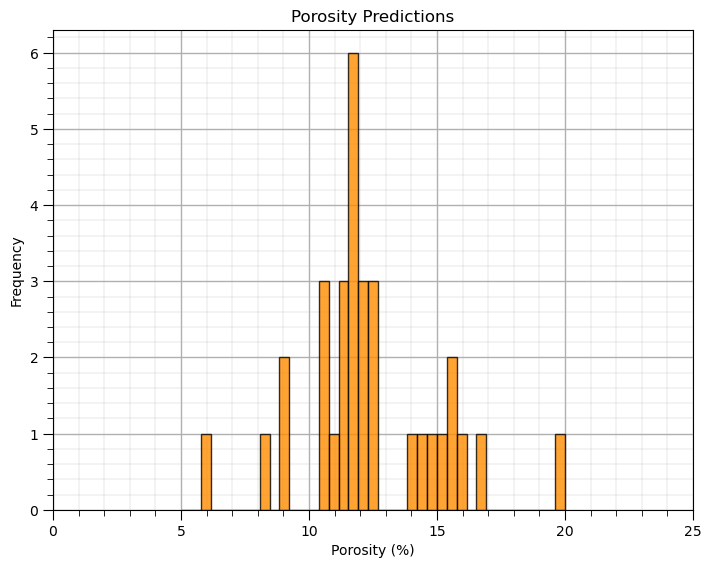

In [16]:
y_hat = linear.slope * x + linear.intercept                

plt.subplot(111)
plt.hist(y_hat, color = 'darkorange', alpha = 0.8, edgecolor = 'black', bins = np.linspace(5,20,40))
plt.xlabel(yname + ' (' + yunit + ')'); plt.ylabel('Frequency'); plt.title(yname + ' Predictions'); plt.xlim([ymin,ymax]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Checking Prediction Error

It is useful to plot the predictions of porosity with the training porosity vs. density scatter plot. 

* From this plot we can observe the linear limitation of our model
* and get a sense of the unexplained variance $\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} {n-1}$

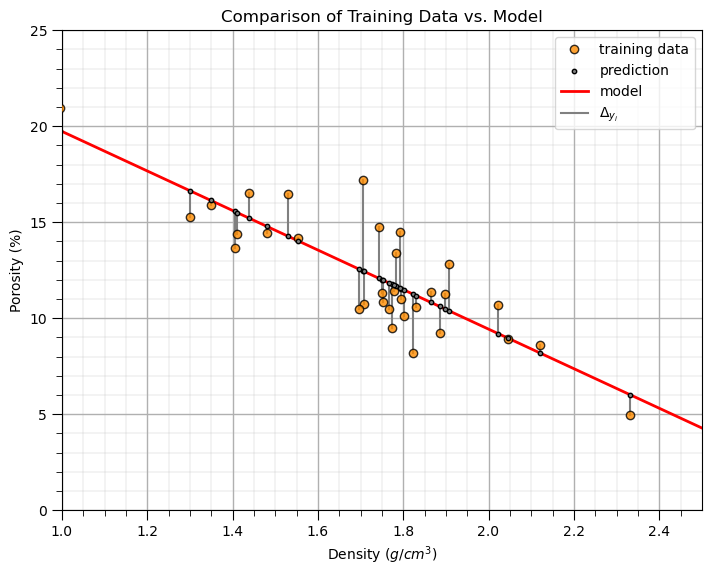

In [17]:
plt.subplot(111)
plt.plot(x, y, 'o', label='training data', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black',zorder=10)
plt.scatter(x, y_hat,s=10,marker='o',label='prediction',color = 'grey',edgecolor='black',alpha=1.0,zorder=10)
plt.plot(dX,dX*linear.slope+linear.intercept,color='red',lw=2,zorder=2,label='model')
for idata in range(0,len(x)):
    if idata == 0:
        plt.plot([x[idata],x[idata]],[y[idata],y_hat[idata]],color='grey',label=r'$\Delta_{y_i}$',zorder=1)
    else:  
        plt.plot([x[idata],x[idata]],[y[idata],y_hat[idata]],color='grey')
plt.title('Comparison of Training Data vs. Model')
plt.title('Comparison of Training Data vs. Model')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

See the plotted error residuals,

$$
\Delta y_i = y_i - \hat{y}_i
$$

where $y_i$ are the true response values and $\hat{y}_i$ are the estimated response values. 

It is good to check the error residual distribution that,

* the average is close to 0.0
* the shape is not skewed
* there are no outliers

Let's look at the error residual distribution.

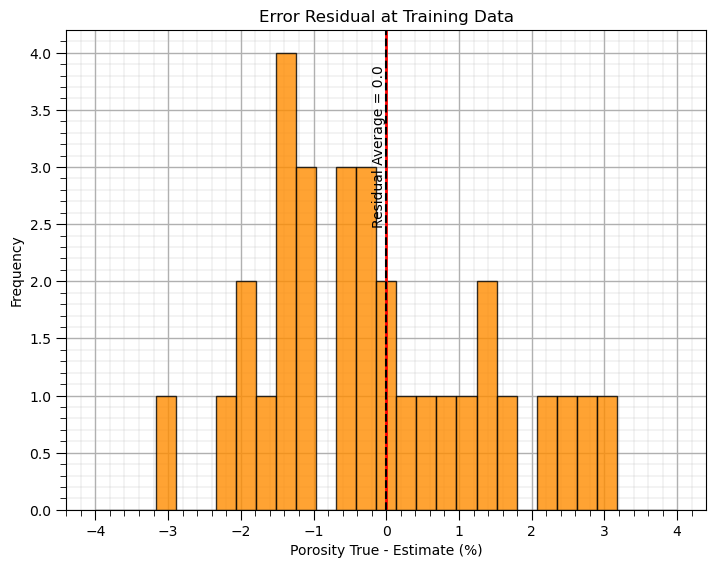

The average of the residuals is 0.0


In [18]:
residual = y - y_hat

plt.subplot(111)
plt.hist(residual, color = 'darkorange', alpha = 0.8, edgecolor = 'black', bins = np.linspace(-4,4,30))
plt.title("Error Residual at Training Data"); plt.xlabel(yname + ' True - Estimate (%)');plt.ylabel('Frequency'); add_grid()
plt.vlines(0,0,4.2,color='red',lw=2,zorder=1); plt.vlines(np.average(residual),0,4.2,color='black',ls='--',zorder=10); plt.ylim([0,4.2])
plt.annotate('Residual Average = ' + str(np.round(np.average(residual),2)),[np.average(residual)-0.2,2.5],rotation=90.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

print('The average of the residuals is ' + str(round(np.mean(residual),2)))

Next we will check the truth vs. estimated scatter plot, and cross validation residual plot, residual vs. the fitted value.  

* with these plots we check if the errors are consistent over the range of fitted values 

* for example, we could use this plot to identify higher error or systematic under- or overestimation over a specific range of fitted values

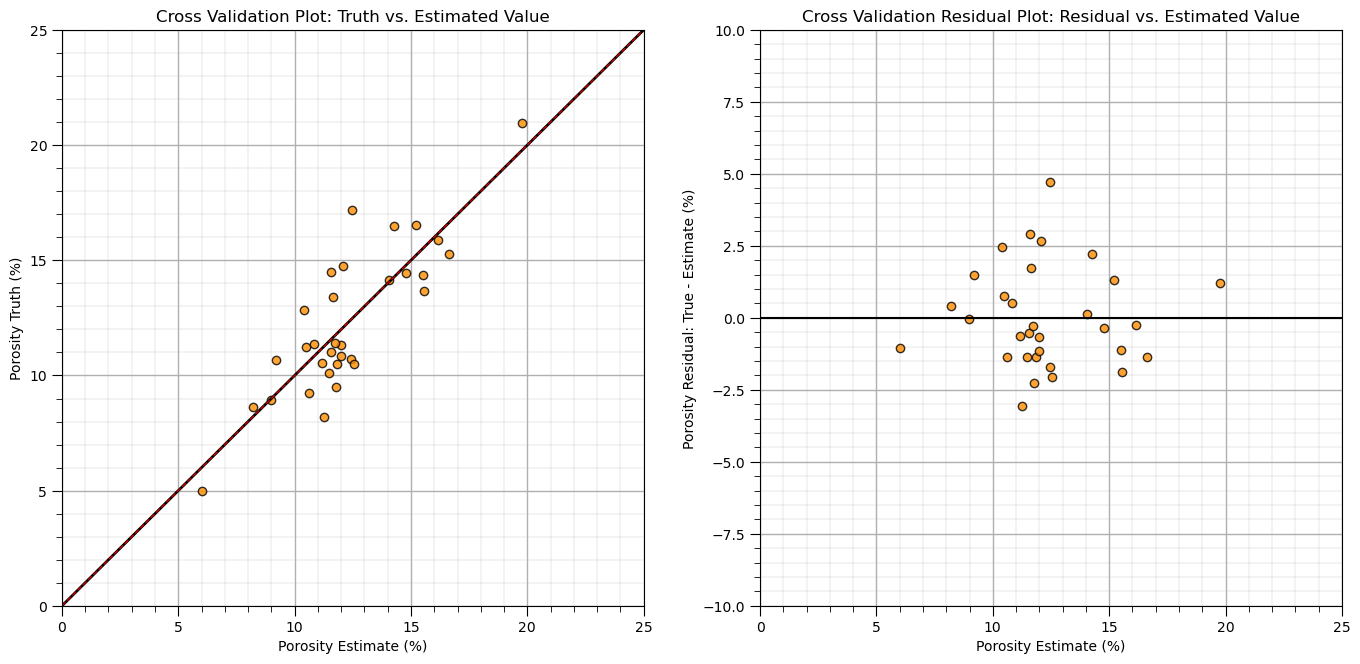

In [19]:
slope_cross, intercept_cross, _, _, _ = st.linregress(y_hat,y) # check for conditional bias with a linear fit to the cross validation plot

plt.subplot(121)
plt.plot(y_hat, y, 'o', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black')
plt.plot([ymin,ymax], [ymin,ymax], 'black',lw=2.0)
plt.plot(np.linspace(ymin,ymax,100), slope_cross*np.linspace(ymin,ymax,100)+intercept_cross, 
         alpha = 0.8, color = 'red',ls='--',lw=1.0)
plt.title('Cross Validation Plot: Truth vs. Estimated Value')
plt.xlabel(yname + ' Estimate (%)'); plt.ylabel(yname + ' Truth (%)'); add_grid(); plt.xlim([ymin,ymax]); plt.ylim([ymin,ymax])

plt.subplot(122)
plt.plot(y_hat, residual, 'o', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black')
plt.plot([ymin,ymax], [0,0], 'black')
plt.title('Cross Validation Residual Plot: Residual vs. Estimated Value')
plt.xlabel(yname + ' Estimate (%)'); plt.ylabel(yname + ' Residual: True - Estimate (%)'); add_grid()
plt.xlim([ymin,ymax]); plt.ylim([-10,10])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

For the demonstration case, there is no apparent conditional bias in the estimates over the range of values.

#### Comments

I hope you found this chapter helpful. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources),

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)